import numpy as np

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d
from scipy.constants import elementary_charge, epsilon_0
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Trap Electric Field

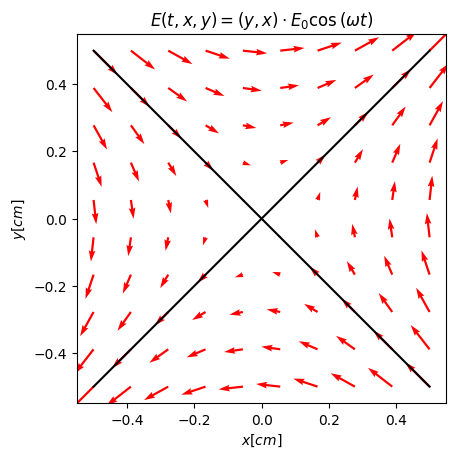

In [ ]:
L= 0.5
N = 10
x, y = np.meshgrid(np.linspace(-L, L, N), np.linspace(-L, L, N))

u = y
v = x

plt.plot([-L, L], [-L, L], color="black")
plt.plot([L, -L], [-L, L], color="black")
plt.quiver(x, y, u, v, color="red")
plt.xlabel("$x[cm]$")
plt.ylabel("$y[cm]$")
plt.title(r"$E(t, x, y)= (y, x)\cdot E_0\cos{\left(\omega t\right)}$")
plt.gca().set_aspect('equal')

# One Particle

In [ ]:
def f(t, state):
    q = 200 * elementary_charge
    m = 510 * 1e-12
    omega = 50 * 2 * np.pi
    E0 = 1e11
    gamma = 1e-10
    x, y, vx, vy = state

    dx_dt = vx
    dy_dt = vy
    dvx_dt = q * y / m * np.cos(omega * t) * E0 - gamma * vx / m
    dvy_dt = q * x / m * np.cos(omega * t) * E0 - gamma * vy / m  - 2

    return [dx_dt, dy_dt, dvx_dt, dvy_dt]

Text(0.5, 1.0, 'Closed Orbit')

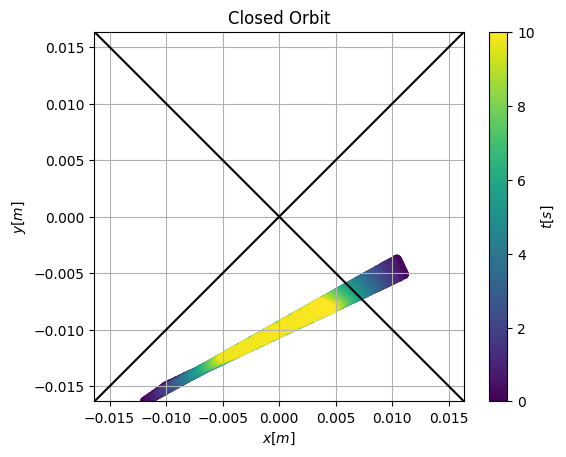

In [ ]:
initial_state = [-0.01, -0.015, 0, 0]
res = solve_ivp(f, [0, 10], initial_state, max_step=1e-3)

res.y[:2, :].shape
t = res.t
x = res.y[0, :]
y = res.y[1, :]
vx = res.y[2, :]
vy = res.y[3, :]

fig = plt.figure('simu')
plt.plot([-1, 1], [-1, 1], color="black")
plt.plot([-1, 1], [1, -1], color="black")

plt.scatter(x, y, c=t)
plt.colorbar(label="$t [s]$")
# plt.plot(x, y)
x_max = np.max(np.abs(x))
y_max = np.max(np.abs(y))
l = max(x_max, y_max)
plt.xlim(-l, l)
plt.ylim(-l, l)
plt.grid()
plt.gca().set_aspect('equal')
plt.xlabel("$x[m]$")
plt.ylabel("$y[m]$")
plt.title("Closed Orbit")

Text(0, 0.5, '$y[m]$')

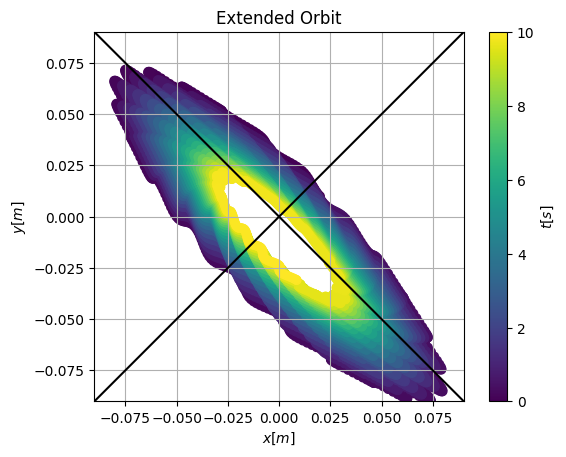

In [ ]:
initial_state = [0.02, 0.01, -1, 1]
res = solve_ivp(f, [0, 10], initial_state, max_step=1e-3)

res.y[:2, :].shape
t = res.t
x = res.y[0, :]
y = res.y[1, :]
vx = res.y[2, :]
vy = res.y[3, :]

plt.figure('simu')
plt.plot([-1, 1], [-1, 1], color="black")
plt.plot([-1, 1], [1, -1], color="black")

plt.scatter(x, y, c=t)
plt.colorbar(label="$t[s]$")
x_max = np.max(np.abs(x))
y_max = np.max(np.abs(y))
l = max(x_max, y_max)
plt.xlim(-l, l)
plt.ylim(-l, l)
plt.grid()
plt.gca().set_aspect('equal')
plt.title("Extended Orbit")

plt.xlabel("$x[m]$")
plt.ylabel("$y[m]$")


# Two Particles

In [ ]:
def distance(x1, y1, z1, x2, y2, z2):
    return np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2 + (z1 - z2) ** 2)

def f2(t, state):
    q = 200 * elementary_charge
    m = 510 * 1e-12
    omega = 50 * 2 * np.pi
    E0 = 1e11
    gamma = 1e-10
    x1, y1, z1, vx1, vy1, vz1, x2, y2, z2, vx2, vy2, vz2 = state
    r12 = np.array([x1 - x2, y1 - y2, z1 - z2])
    F = q ** 2 / (4 * np.pi * epsilon_0 * np.linalg.norm(r12) ** 3) * r12
    G = 2

    dx_dt1 = vx1
    dy_dt1 = vy1
    dz_dt1 = vz1
    dvx_dt1 = q * y1 / m * np.cos(omega * t) * E0 - gamma * vx1 / m + F[0] / m
    dvy_dt1 = q * x1 / m * np.cos(omega * t) * E0 - gamma * vy1 / m + F[1] / m - G
    dvz_dt1 = F[2] / m - gamma * vz1 / m

    dx_dt2 = vx2
    dy_dt2 = vy2
    dz_dt2 = vz2
    dvx_dt2 = q * y2 / m * np.cos(omega * t) * E0 - gamma * vx2 / m - F[0] / m
    dvy_dt2 = q * x2 / m * np.cos(omega * t) * E0 - gamma * vy2 / m - F[1] / m - G
    dvz_dt2 = - F[2] / m - gamma * vz2 / m

    return [dx_dt1, dy_dt1, dz_dt1, dvx_dt1, dvy_dt1, dvz_dt1, dx_dt2, dy_dt2, dz_dt2, dvx_dt2, dvy_dt2, dvz_dt2]

Text(0.5, 1.0, 'Two Electrically Interacting Particles in Closed Orbits')

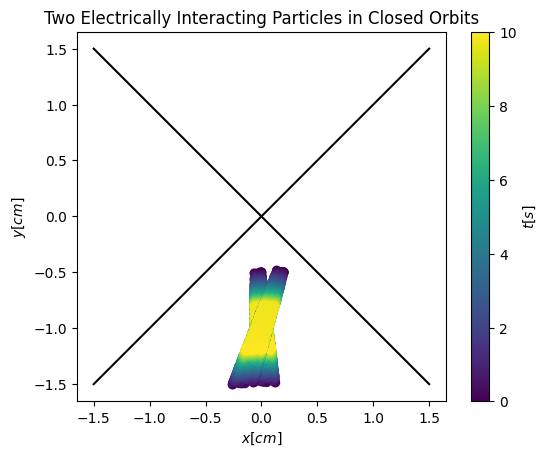

In [ ]:
initial_state = [0, -0.005, 0,
                 0, 0, 0,
                 0.002, -0.005, 0.0001,
                 0, 0, 0]
res = solve_ivp(f2, [0, 10], initial_state, max_step=1/4)
t = res.t
x1 = res.y[0, :]
y1 = res.y[1, :]
z1 = res.y[2, :]
x2 = res.y[6, :]
y2 = res.y[7, :]
z2 = res.y[8, :]
plt.figure('simu2')
plt.scatter(x1 * 100, y1 * 100, c=t, cmap="viridis")
plt.scatter(x2 * 100, y2 * 100, c=t, cmap="viridis")
plt.xlabel("$x[cm]$")
plt.ylabel("$y[cm]$")
# plt.grid()

L = 1.5
plt.plot([-L, L], [-L, L], color="black")
plt.plot([L, -L], [-L, L], color="black")
plt.gca().set_aspect('equal')
plt.colorbar(label="$t[s]$")
plt.title("Two Electrically Interacting Particles in Closed Orbits")


Text(0.5, 1.0, 'Two Electrically Interacting Particles in Closed Orbits, side view')

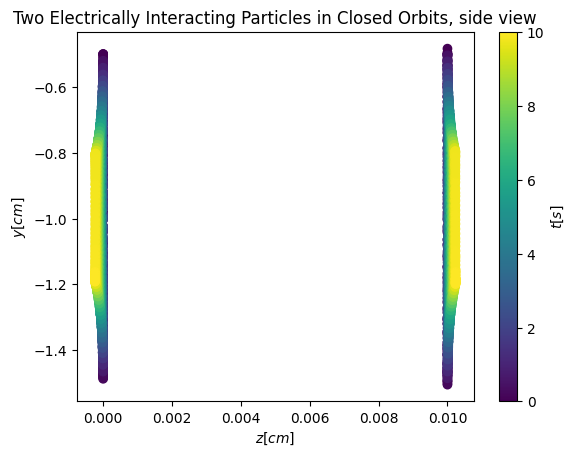

In [ ]:
plt.figure('simu2')
plt.scatter(z1 * 100, y1 * 100, c=t, cmap="viridis")
plt.scatter(z2 * 100, y2 * 100, c=t, cmap="viridis")
plt.xlabel("$z[cm]$")
plt.ylabel("$y[cm]$")
# plt.grid()

plt.colorbar(label="$t[s]$")
plt.title("Two Electrically Interacting Particles in Closed Orbits, side view")


Text(0, 0.5, 'z')

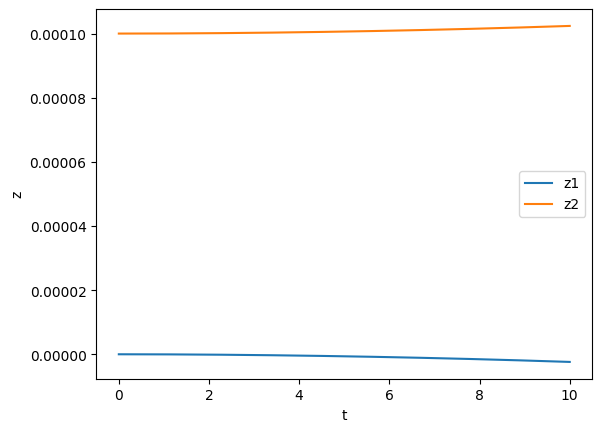

In [ ]:
plt.plot(t, z1, label="z1")
plt.plot(t, z2, label="z2")
plt.legend()
plt.xlabel("t")
plt.ylabel("z")

Text(0, 0.5, '$d[cm]$')

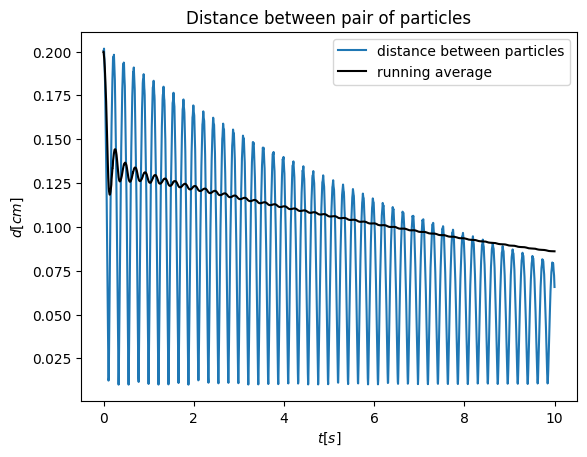

In [ ]:
dis = distance(x1, y1, z1, x2, y2, z2)
window = 1 / 50
running_avg = np.zeros_like(dis)
for i in range(len(t)):
    running_avg[i] = np.average(dis[np.where((t - t[i]) < window)])

plt.plot(t, dis * 100, label="distance between particles")
plt.plot(t, running_avg * 100, label="running average", color="black")
plt.legend()
plt.title("Distance between pair of particles")
plt.xlabel("$t[s]$")
plt.ylabel("$d[cm]$")